# Sepide Mashayekhi

### Data_analysis_iris_dataset

<img src = "https://upload.wikimedia.org/wikipedia/commons/6/64/Iris_Flower_Hubr_iridaceae-2_Luc_Viatour.jpg" width=50%>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns

In [2]:
iris=pd.read_csv('data/Iris.csv')

## EDA

In [3]:
def EDA(data):
    print('Data shape :',data.shape)
    print ('Data columns ',data.columns)
    print ('info dataframe',data.info())
    print ('Null values in data frame',data.isnull().sum())
    return data.head(3)
EDA(iris)

Data shape : (150, 6)
Data columns  Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
info dataframe None
Null values in data frame Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


## Visualization

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

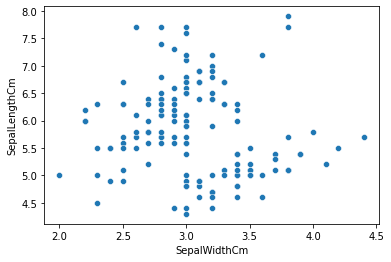

In [10]:
sns.scatterplot(data= iris, x="SepalWidthCm", y="SepalLengthCm")
                


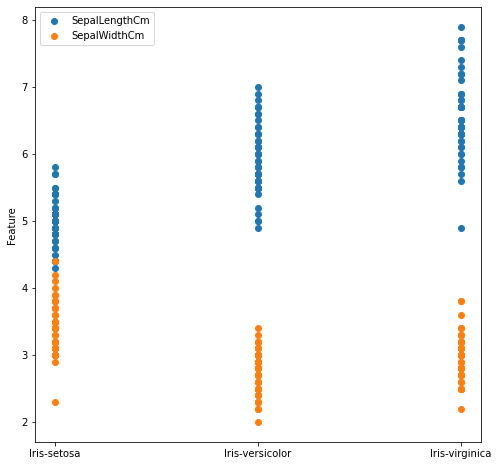

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(y='SepalLengthCm',x='Species',data=iris)
plt.scatter(y='SepalWidthCm',x='Species',cmap=True,data=iris)
plt.ylabel("Feature")
plt.legend()


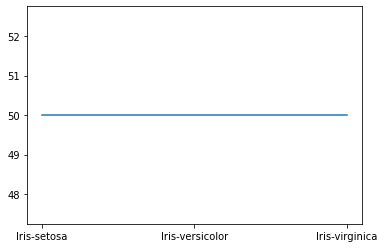

In [28]:
plt.plot(iris.Species.value_counts())

[Text(0.5, 0, 'Petal Length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

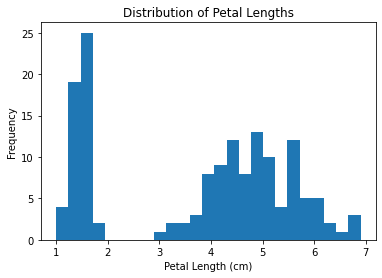

In [29]:
ax = plt.axes()
ax.hist(iris.PetalLengthCm, bins=25)
ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths')

Text(0.5, 0, 'Size (cm)')

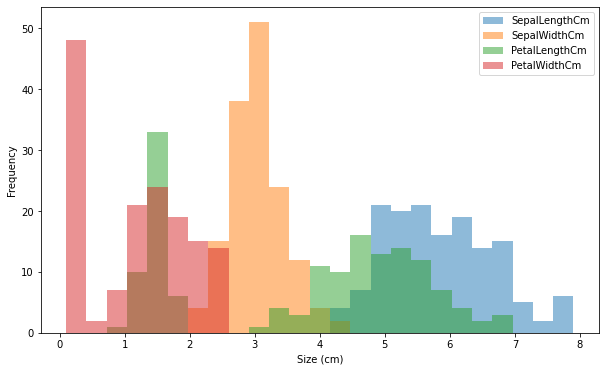

In [30]:
ax = iris.iloc[:,1:].plot.hist(bins=25, alpha=0.5, figsize=(10,6))
ax.set_xlabel('Size (cm)')

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

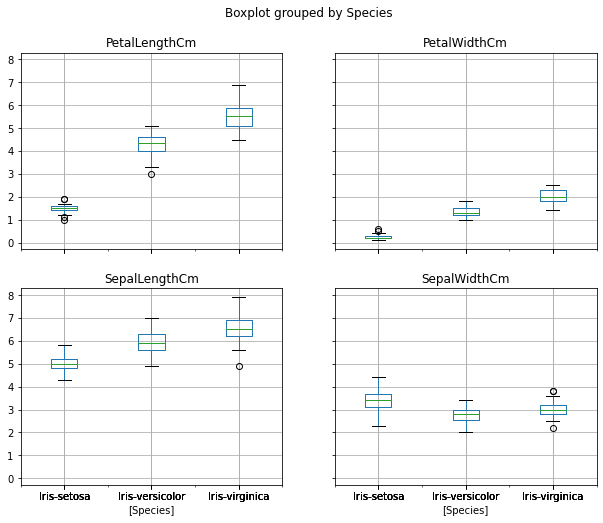

In [32]:
iris.iloc[:,1:].boxplot(by='Species', figsize=(10,8))

## Data_processing 

In [35]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [41]:
iris.groupby('Species')['SepalLengthCm'].mean().reset_index()


,Species,SepalLengthCm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


In [42]:
iris.groupby('Species')['SepalWidthCm'].mean().reset_index()

,Species,SepalWidthCm
0,Iris-setosa,3.418
1,Iris-versicolor,2.770
2,Iris-virginica,2.974


In [50]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le=LabelEncoder()
iris.iloc[:,-1]=le.fit_transform(iris.iloc[:,-1])
label=np_utils.to_categorical(iris.iloc[:,-1])


In [53]:
feature=iris.iloc[:,1:5].values